# Assignment 4. Growth of Turbulent Boundary Layer

In the Notebook we have found a function that computes, for every $c_f$ the corresponding value of $\text{Re}_\delta$ (and, consequently, $\delta$). 

1. Use this function to find a power fit of the type 

$$
c_f = K \text{Re}_\delta^n
$$

2.  Use this to define a function for the friction velocity as a function of $\delta$ and $U$, `u_tau(delta, U)`

3. Introduce this function into the log-law to find a cloud of points $(y,u)$ and fit again witha power law

$$ 
\left(\frac{u}{U}\right) = K'\left(\frac{y}{\delta}\right)^m
$$

This is know as the power-law for the turbulent boundary layer. It is, as the log-law, valid only for $y^+ \gtrapprox 30$

4. Finally use the von Kármán equation for steady uniform flow, equation (28), to find how a turbulent boundary layer grows, $\delta(x)$.

---------------------------------
# A4: GROUP 1 SOLUTION (Pol Padilla, Ferran de Miguel, Alejandro Sanchez)
---------------------------------

## 0. Importing basic libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import simpson
from IPython.display import Latex
import sympy as sp
import scipy.optimize as opt

# PRINT COLORS:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

## 1. Power law fit on turbulence friction coefficient and Reynolds

Points of $C_f$ and the $Re_\delta$ generated for the power law fitting using the relationship of the turbulent boundary layer:

$$
Re_\delta = \dfrac{0.182058646604666 e^{\frac{0.579827560572969}{\sqrt{c_f}}}}{\sqrt{c_f}}
$$

In [2]:
#Cf_array = np.linspace(0.001,0.005,1000)
#Cf_array = np.linspace(0.0005,0.001,1000)
Cf_array = np.logspace(-2.4,-2.8,100)
ReDelta_array = 0.182058646604666*np.exp(0.579827560572969/np.sqrt(Cf_array))/np.sqrt(Cf_array)
print(ReDelta_array)

[  28263.40782928   29638.27463386   31086.23113668   32611.47117992
   34218.4460209    35911.88111823   37696.79407458   39578.51381992
   41562.70112551   43655.37054568   45862.91389191   48192.12535175
   50650.22837378   53244.90444915   55984.32393028   58877.17903845
   61932.71922348   65160.78905184   68571.86881299   72177.11804905
   75988.42222881   80018.44280464   84280.67090996   88789.48497539
   93560.21256369   98609.19674823  103953.86738519  109612.81765855
  115605.88630721  121954.24597717  128680.49817743  135808.77535786
  143364.85066944  151376.25601353  159872.40903711  168884.74978498
  178446.88777939  188594.76036156  199366.80319953  210804.13394265
  222950.75008551  235853.74219403  249563.52374413  264134.07892963
  279623.22991202  296092.92511061  313609.55026899  332244.26418332
  352073.36114111  373178.66229658  395647.93840293  419575.36653275
  445062.02364867  472216.420138    501155.07669944  532003.14827025
  564895.09900949  599975.4327108 

Power law fitting for the friction coefficient and Reynolds to $c_f = K \cdot Re_\delta ^n $:

Parameter K = 0.02053879172184802
Parameter n = -0.16223392354264313


Eq(c_f, 0.020538791721848/Re_delta**0.162233923542643)

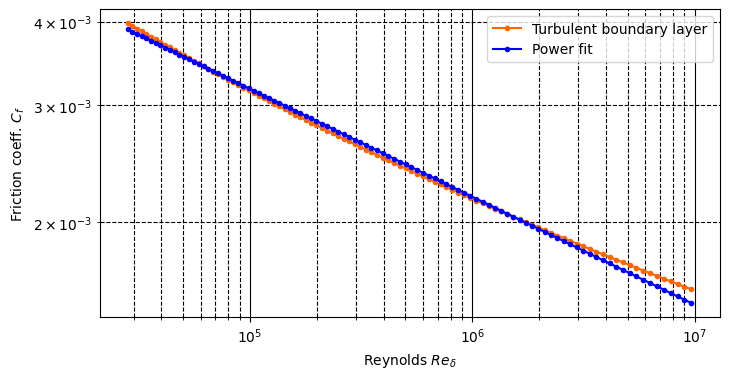

In [3]:
def func_power(ReDelta, K, n):
    return K*ReDelta**n

popt, pcov = opt.curve_fit(func_power,ReDelta_array,Cf_array)
[Kres,nres] = popt

print("Parameter K = {0}".format(Kres))
print("Parameter n = {0}".format(nres))
cf, K, Re_delta, n = sp.symbols('c_f,K,Re_delta,n', positive=True, real=True)
display(sp.Eq(cf,Kres*Re_delta**nres))

Cf_data_power = func_power(ReDelta_array,Kres,nres)

fig,ax = plt.subplots(figsize=(8,4))
plt.minorticks_on()
ax.plot(ReDelta_array,Cf_array,'.-',color=(1,0.4,0))
ax.plot(ReDelta_array,Cf_data_power,'.-',color=(0,0,1))
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(visible=True, which='major', color='k', linestyle='-')
ax.grid(visible=True, which='minor', color='k', linestyle='--')
ax.set_xlabel(r'Reynolds $Re_\delta$')
ax.set_ylabel(r'Friction coeff. $C_f$')
ax.legend(['Turbulent boundary layer', 'Power fit'])

## 2. Definition of the friction velocity



In [4]:
tau_w, u_tau, delta, U, nu = sp.symbols('tau_w,u_tau,delta,U,nu', positive=True, real=True)
eq1 = sp.Eq(cf,2*(u_tau/U)**2)
eq1

Eq(c_f, 2*u_tau**2/U**2)

In [5]:
eq2 = eq1.replace(cf,K*Re_delta**n)
eq2

Eq(K*Re_delta**n, 2*u_tau**2/U**2)

In [6]:
eq3 = eq2.replace(Re_delta,delta*U/nu)
eq3

Eq(K*(U*delta/nu)**n, 2*u_tau**2/U**2)

In [7]:
u_tau_solve = sp.solve(eq3,u_tau)
display(sp.Eq(u_tau,u_tau_solve[0]))

Eq(u_tau, sqrt(2)*sqrt(K)*U**(n/2 + 1)*delta**(n/2)/(2*nu**(n/2)))

## 3. Turbulent profile fitting

### 3.1. The Log Law:

In [8]:
uPlus, yPlus, a, b = sp.symbols('u^+,y^+,a,b', positive=True, real=True)
LogLaw = sp.Eq(uPlus,1/a*sp.ln(yPlus)+b)
display(LogLaw)

Eq(u^+, b + log(y^+)/a)

### 3.2. The turbulent profile extracted from $u^+$ and $y^+$:

In [9]:
y_delta,u_U = sp.symbols('y/_delta,u/_U', positive=True, real=True)
####################################################################################

yDelta_eq = sp.Eq(y_delta, yPlus*nu/(u_tau*delta))
uU_eq = sp.Eq(u_U, uPlus*u_tau / U)
display(yDelta_eq,uU_eq)

yDelta_eq = yDelta_eq.replace(u_tau,u_tau_solve[0])
uU_eq = uU_eq.replace(u_tau,u_tau_solve[0])
display(yDelta_eq.simplify())
display(uU_eq.simplify())

yplus=sp.solve(yDelta_eq,yPlus)
display(yplus[0].simplify())
uplus=sp.solve(uU_eq,uPlus)
display(uplus[0].simplify())
LogLawSubs=LogLaw.replace(uPlus,uplus[0])
LogLawSubs2=LogLawSubs.replace(yPlus,yplus[0])
display(LogLawSubs2.simplify())

Eq(y/_delta, nu*y^+/(delta*u_tau))

Eq(u/_U, u^+*u_tau/U)

Eq(y/_delta, sqrt(2)*y^+*(nu/(U*delta))**(n/2 + 1)/sqrt(K))

Eq(u/_U, sqrt(2)*sqrt(K)*U**(n/2)*delta**(n/2)*u^+/(2*nu**(n/2)))

sqrt(2)*sqrt(K)*y/_delta*(U*delta/nu)**(n/2 + 1)/2

sqrt(2)*nu**(n/2)*u/_U/(sqrt(K)*U**(n/2)*delta**(n/2))

Eq(sqrt(2)*nu**(n/2)*u/_U/(sqrt(K)*U**(n/2)*delta**(n/2)), (a*b + log(sqrt(2)*sqrt(K)*nu**(-n/2 - 1)*y/_delta*(U*delta)**(n/2 + 1)/2))/a)

### 3.3. Parameter substitution and cloud of points generation

Selecting a suitable Reynolds on the middle of the previous fitting range to get cloud of points $\left(\frac{u}{U},\frac{y}{\delta} \right)$

The only parameter that modifies the next power law fitting is $Re_\delta$: [$U$, $\delta$, $\nu$] must comply with the Reynolds fixed and any variation inside yields the same fitting.

In [10]:
############################################################################
# Selecting a Reynolds:
ReDelta_par = np.mean(ReDelta_array)
#ReDelta_par = 5e4 # Uncomment and play with Reynolds!!!!
print(r'Re_delta = {0}'.format(ReDelta_par))
############################################################################
# Fixing U, with nu (air), the delta is provided to maintain that Reynolds:
U_par = 10 # m/s
nu_par = 1.5e-5 # m2/s
delta_par = ReDelta_par * nu_par / U_par

# Limits of the y/delta solution from outer logarithmic layer [y+ >= 30]
yPlus_sol = sp.solve(yDelta_eq,yPlus)
yPlus_sol_lamb = sp.lambdify((n,K,nu,U,delta,y_delta),yPlus_sol[0])
yPlus_0 = yPlus_sol_lamb(nres,Kres,nu_par,U_par,delta_par,0.001)
yPlus_1 = yPlus_sol_lamb(nres,Kres,nu_par,U_par,delta_par,1)
# Creating arrays limits for y+
y_plus_array = np.linspace(yPlus_0,yPlus_1)
a_par,b_par = 0.41,5.0
u_plus_array = (1/a_par)*np.log(y_plus_array) + b_par
# Creating custom array for y+
"""
y_plus_array = np.linspace(350,15e3)
a_par,b_par = 0.41,5.0
u_plus_array = (1/a_par)*np.log(y_plus_array) + b_par
"""
print(r"y+ limits for fitting are [{0} - {1}]".format(y_plus_array[0],y_plus_array[-1]))

# Arrays for fitting:
yDelta_lamb = sp.lambdify((n,K,nu,U,delta,yPlus),yDelta_eq.rhs)
uU_lamb = sp.lambdify((n,K,nu,U,delta,uPlus),uU_eq.rhs)

yDelta_array = yDelta_lamb(nres,Kres,nu_par,U_par,delta_par,y_plus_array)
uU_array = uU_lamb(nres,Kres,nu_par,U_par,delta_par,u_plus_array)

Re_delta = 1470157.2683430316
y+ limits for fitting are [47.082382339224004 - 47082.382339224]


### 3.4. Fitting function $\left(\frac{u}{U}\right) = K'\left(\frac{y}{\delta}\right)^m$

Parameter Kp = 1.0098104164990576
Parameter m = 0.09571516038821783


Eq(u/_U, 1.00981041649906*y/_delta**0.0957151603882178)

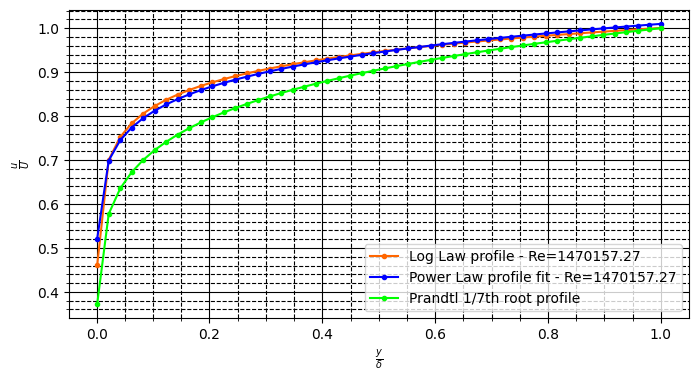

In [11]:
def func_power_profile(yDeltaPoint, Kp, m):
    return Kp*yDeltaPoint**m

popt, pcov = opt.curve_fit(func_power_profile,yDelta_array,uU_array)
[Kpres,mres] = popt

print("Parameter Kp = {0}".format(Kpres))
print("Parameter m = {0}".format(mres))
display(sp.Eq(u_U,Kpres*y_delta**mres))
uU_data_power = func_power_profile(yDelta_array,Kpres,mres)

# Prandtl 1/7th law:
uU_prandtl = yDelta_array**(1/7)


fig,ax = plt.subplots(figsize=(8,4))
plt.minorticks_on()
ax.plot(yDelta_array,uU_array,'.-',color=(1,0.4,0))
ax.plot(yDelta_array,uU_data_power,'.-',color=(0,0,1))
ax.plot(yDelta_array,uU_prandtl,'.-',color=(0,1,0))
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid(visible=True, which='major', color='k', linestyle='-')
ax.grid(visible=True, which='minor', color='k', linestyle='--')
ax.set_xlabel(r'$\frac{y}{\delta}$')
ax.set_ylabel(r'$\frac{u}{U}$')
ax.legend(['Log Law profile - Re={:0.2f}'.format(ReDelta_par), 'Power Law profile fit - Re={:0.2f}'.format(ReDelta_par), 'Prandtl 1/7th root profile'])

Comparing the solution aswell with Prandtl 1/7th root profile, and trying out different Reynolds, it can be seen that it fits best to this model around lower Reynolds such as $Re_\delta\sim 1e4,1e5$. With higher Reynolds, the profile is above the Prandtl model, so the solution is consistent with [Frank M. White](https://discovery.upc.edu/discovery/fulldisplay?docid=alma991001731269706711&context=L&vid=34CSUC_UPC:VU1&lang=ca&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&isFrbr=true&tab=Everything&query=any,contains,Frank%20White&sortby=date_d&facet=frbrgroupid,include,9029151313638391910&offset=0) fig.7.5 (p.461)

## 4. Von Kármán equation to find $\delta(x)$

The Von Kármán equation is the following:
$$
\frac{\partial}{\partial{t}}\left(U\delta'\right)+\frac{\partial}{\partial{x}}\left(U^2\theta\right)+U\delta'\frac{\partial{U}}{\partial{x}}=\frac{\tau_w}{\rho}
$$

In order to obtain the growth of the boundary layer with $x$, $\delta(x)$, the velocity profile and the stress on the wall should be known.

Then, for a steady and uniform flow, both the first and third terms of the LHS of the Von Kármán equation are 0, so:
$$
\tau_w = \rho U^2 \frac{\partial{\theta}}{\partial{x}}
$$

In [12]:
rho, x = sp.symbols('rho,x')
theta = sp.Function('theta')
vonkarman = sp.Eq(tau_w,rho*U**2*theta(x).diff(x))
vonkarman

Eq(tau_w, U**2*rho*Derivative(theta(x), x))

The stress on the wall is related with the friction coefficient as follows:
$$
\tau_w = \frac{1}{2}\rho U^2 c_f
$$

Replacing it into the Von Kármán equation, we get:

In [13]:
vonkarman = vonkarman.replace(tau_w,0.5*rho*U**2*cf).simplify()
vonkarman = sp.solve(vonkarman,cf)
display(sp.Eq(cf,vonkarman[0]))

Eq(c_f, 2.0*Derivative(theta(x), x))

Also, it is known that the _momentum thickness_ is:
$$
\theta  =  \int_0^\infty \frac{u}{U}\left(1-\frac{u}{U}\right) \text{d}y \\
\frac{\theta}{\delta}  =  \int_0^\infty \frac{u}{U}\left(1-\frac{u}{U}\right) \text{d}\left(\frac{y}{\delta}\right)
$$

From the previous power law profile fit, the _momentum thickness_ can be obtained:

In [14]:
thetasym = sp.symbols('theta')
momentum_delta = simpson(uU_data_power*(1-uU_data_power),yDelta_array)
display(sp.Eq(thetasym,momentum_delta*delta))

Eq(theta, 0.0655146170352577*delta)

And replacing it into the last modification of the Von Kármán equation, the following is obtained:

In [15]:
deltaf = sp.Function('delta')
vonkarman = sp.Eq(cf,vonkarman[0].replace(theta(x),momentum_delta*deltaf(x)))
display(vonkarman)

Eq(c_f, 2.0*Derivative(0.0655146170352577*delta(x), x))

In [16]:
vonkarman = sp.Eq(deltaf(x).diff(x),cf/(2*momentum_delta))
vonkarman

Eq(Derivative(delta(x), x), 7.63188464844292*c_f)

Now, the first power fit for the friction coefficient $c_f=KRe_{\delta}^n$ can be replaced:

In [17]:
vonkarman = vonkarman.replace(cf,K*Re_delta**n)
vonkarman

Eq(Derivative(delta(x), x), 7.63188464844292*K*Re_delta**n)

Where the Reynolds is:
$$
Re_{\delta}=\frac{\delta U}{\nu}
$$

In [24]:
vonkarman = vonkarman.replace(Re_delta,delta*U/nu)
vonkarman = vonkarman.replace(delta,deltaf(x))
vonkarman

Eq(Derivative(delta(x), x), 7.63188464844292*K*(U*delta(x)/nu)**n)

In [25]:
ode_sol=sp.dsolve(vonkarman)
display(ode_sol)

TypeError: 
Second argument must be a Boolean, not `Add`

In [4]:
K,U,nu,n,x = sp.symbols('K,U,nu,n,x')
delta = sp.Function("delta")

In [5]:
ode = sp.Eq(delta(x).diff(x),7.6318*K*(U*delta(x)/nu)**n)
display(ode)

Eq(Derivative(delta(x), x), 7.6318*K*(U*delta(x)/nu)**n)

In [6]:
odesol=sp.dsolve(ode)

In [8]:
display(odesol[0])

Eq(delta(x), Piecewise((nu/(U*(-C1*U*n/nu + C1*U/nu - 7.6318*K*U*n*x/nu + 7.6318*K*U*x/nu)**(1/(n - 1))), Ne(n, 1)), (nan, True)))

---------------------------

# DISCARDED CODE (TO BE DELETED OR RECOVERED)

In [20]:
uPlus, yPlus, a, b = sp.symbols('u^+,y^+,a,b', positive=True, real=True)
LogLaw = sp.Eq(uPlus,1/a*sp.ln(yPlus)+b)
display(LogLaw)

y,u,rho,tauW,nu = sp.symbols('y,u,rho,tau_w,nu',positive=True)
LogLaw = LogLaw.replace(uPlus,u*sp.sqrt(rho/tauW)).replace(yPlus,y/nu*sp.sqrt(tauW/rho))
display(LogLaw)

# wall friction substitution
wall_friction = sp.Eq(tau_w,cf*(1/2)*rho*U**2)
LogLaw = LogLaw.replace(tau_w,wall_friction.rhs)
display(LogLaw)

# nu substitution
LogLaw = LogLaw.replace(nu, delta*U/Re_delta)
display(LogLaw)

# then in adimensional terms
y_delta,u_U = sp.symbols('y/_delta,u/_U', positive=True, real=True)
LogLaw = LogLaw.replace(u,u_U*U)
LogLaw = LogLaw.replace(y,y_delta*delta)
display(LogLaw)

# solving...
profile_solve = sp.solve(LogLaw,u_U)
profile_solve = profile_solve[0]
profile_solve = profile_solve.simplify()
display(sp.Eq(u_U,profile_solve))

Eq(u^+, b + log(y^+)/a)

Eq(sqrt(rho)*u/sqrt(tau_w), b + log(sqrt(tau_w)*y/(nu*sqrt(rho)))/a)

Eq(1.4142135623731*u/(U*sqrt(c_f)), b + log(0.707106781186548*U*sqrt(c_f)*y/nu)/a)

Eq(1.4142135623731*u/(U*sqrt(c_f)), b + log(0.707106781186548*Re_delta*sqrt(c_f)*y/delta)/a)

Eq(1.4142135623731*u/_U/sqrt(c_f), b + log(0.707106781186548*Re_delta*sqrt(c_f)*y/_delta)/a)

Eq(u/_U, 0.707106781186545*sqrt(c_f)*(a*b + log(0.707106781186548*Re_delta*sqrt(c_f)*y/_delta))/a)